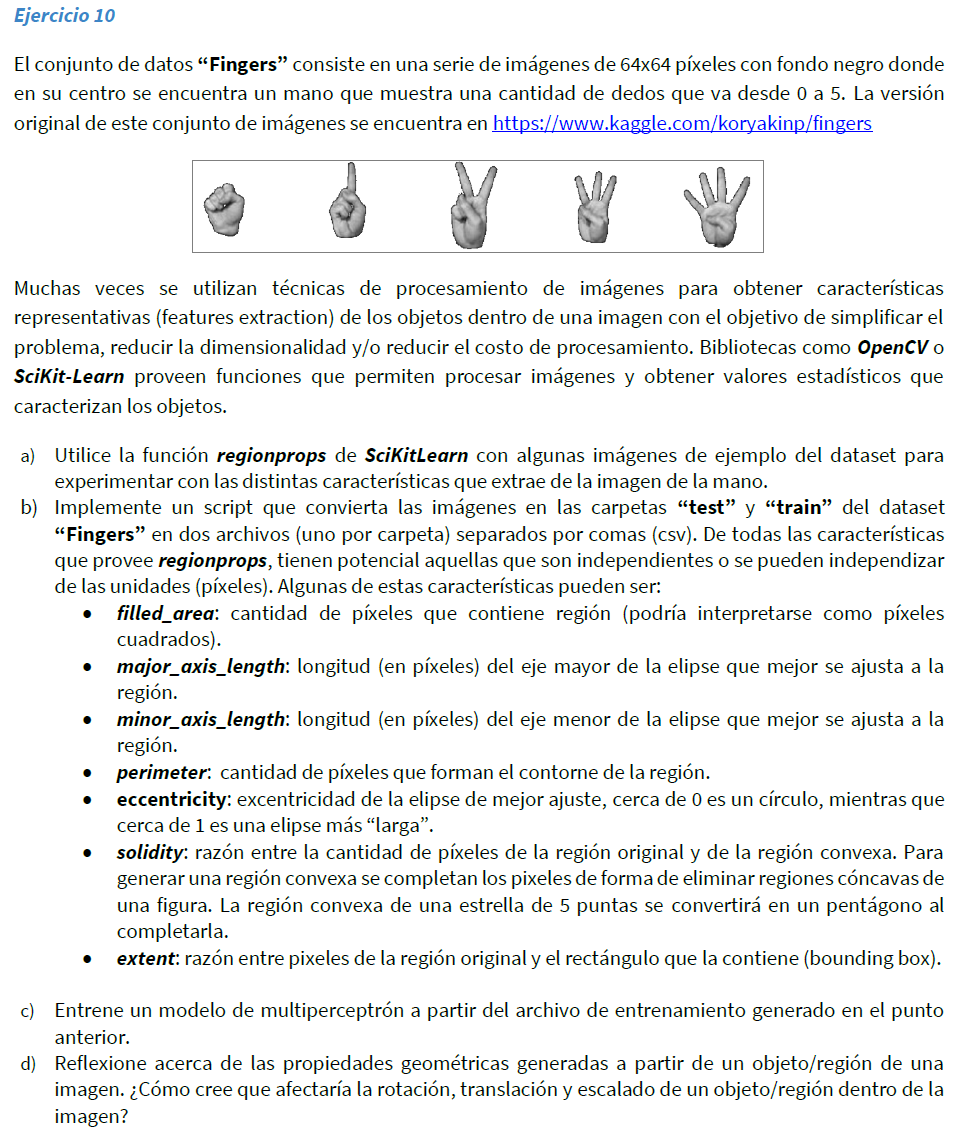

In [1]:
# configuración para notebook con instalación LOCAL
FUENTES_DIR  = '../../Datos-Fuentes/Fuentes/'     # carpeta donde se encuentran archivos .py auxiliares
DATOS_DIR    = '../../Datos-Fuentes/Datos/'      # carpeta donde se encuentran los datasets
MODELOS_DIR  = '../Modelos/'    # carpeta donde se encuentran los modelos
ARCHIVOs_DIR = '../Archivos/'   # carpeta recuperar o copiar archivos

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)

## Propiedades geometricas de una imagen

In [3]:
from skimage.measure import regionprops, find_contours
from skimage.filters import threshold_otsu
from skimage.morphology import closing, square
from skimage.segmentation import clear_border
from skimage import io
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import plotly.graph_objects as go
import pandas as pd
import numpy as np
import glob
import math

arch_img = DATOS_DIR + '/Fingers/fingers/train/1L.png'
imagen = io.imread(arch_img)

# busca umbral global con método estadístico de Otsu
umbral = threshold_otsu(imagen)

# binariza la imagen
imagen_bn = (imagen > umbral)*1

# cierra pequeños huecos/cortes que pudiera tener la imagen de la mano
imagen_bn = closing(imagen_bn, square(3))

# remueve artefactos que pudiera tener la imagen en los bordes
imagen_lista = clear_border(imagen_bn)

# obtiene valores geométricos a partir de las regiones (objetos "aislados") en la imagen
regiones = regionprops(imagen_lista)

# datos de la primera región. Debería ser la única si la mano fue segmentada correctamente
region = regiones[0]

for prop in region:
  if prop not in ['convex_image', 'coords', 'image_filled', 'image', 'image_convex', 'moments', 'moments_central', 'moments_normalized', 'moments_hu']:
    print('%20s:    '% prop, region[prop])

                area:     1451.0
           area_bbox:     2590.0
         area_convex:     1733.0
         area_filled:     1480.0
   axis_major_length:     68.15644469739634
   axis_minor_length:     32.50203748214125
                bbox:     (19, 46, 93, 81)
            centroid:     (65.06409372846313, 62.88077188146106)
      centroid_local:     [46.06409373 16.88077188]
        eccentricity:     0.8789716565975004
equivalent_diameter_area:     42.982212360588434
        euler_number:     0
              extent:     0.5602316602316603
  feret_diameter_max:     74.81310045707235
      inertia_tensor:     [[ 66.39446832   9.1095188 ]
 [  9.1095188  289.96074382]]
inertia_tensor_eigvals:     [290.3313096118278, 66.02390253065715]
               label:     1
         orientation:     -0.04065654847419358
           perimeter:     222.36753236814712
   perimeter_crofton:     210.81764020543505
               slice:     (slice(19, 93, None), slice(46, 81, None))
            solidity:  

## Grafica imagen normal, binarizaria y contornos

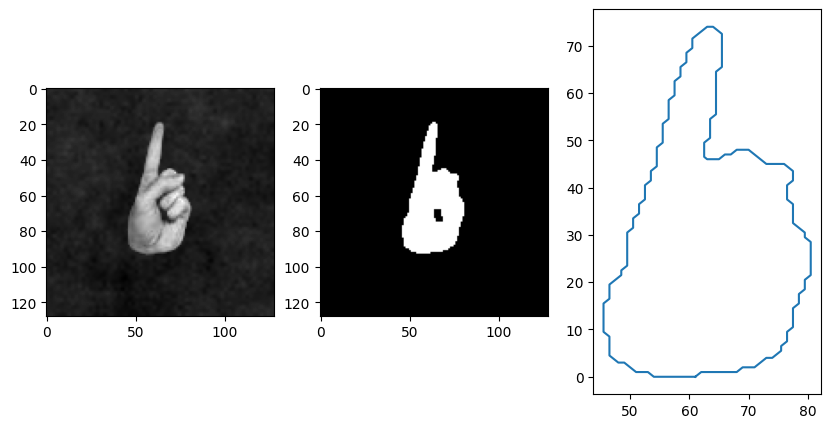

In [4]:
fig, axs = plt.subplots(1,3, figsize=(10,5))
axs[0].imshow(imagen, cmap='gray')
axs[1].imshow(imagen_bn, cmap='gray')

contour = find_contours(imagen_bn, 0.5)[0]
y, x = contour.T

axs[2].plot(x, y.max()-y)


### Gráfica de una imagen de escala de grises como una superficie en 3D
La intensidad del pixel se muestra como altura

In [6]:
def plot_grayscale_surface(img, escala):

    height, width = img.shape  # Dimensiones de la imagen

    # Crea una malla de coordenadas
    x = np.linspace(0, width - 1, width)
    y = np.linspace(0, height - 1, height)
    x, y = np.meshgrid(x, y)

    # Crea la superficie 3D
    fig = go.Figure(data=[go.Surface(z=img*escala, x=x, y=y, colorscale='Gray', cmin=0, cmax=255*escala)])

    # Actualiza el diseño de la figura
    fig.update_layout(
        title='Superficie de  Imagen en Escala de Grises',
        scene=dict(
            xaxis_title='Ancho',
            yaxis_title='Alto',
            zaxis_title='Intensidad de Gris',
        ),
        width=700,  # Ancho de la figura
        height=700,  # Altura de la figura
        margin=dict(l=50, r=0, b=0, t=50)  # Márgenes de la figura
    )

    fig.show()

# Muestra plot de imagen, escala reduce la intensidad (y la altura) para mejor visualización
plot_grayscale_surface(imagen, escala=0.1)

: 